In [1]:
import numpy as np


In [2]:
import skfuzzy as fuzz


ModuleNotFoundError: No module named 'skfuzzy'

In [3]:
!pip install numpy scikit-fuzzy matplotlib


                                              0.0/994.0 kB ? eta -:--:--
                                              10.2/994.0 kB ? eta -:--:--
     ----                                   112.6/994.0 kB 1.3 MB/s eta 0:00:01
     --------                               225.3/994.0 kB 1.7 MB/s eta 0:00:01
     ---------------                        399.4/994.0 kB 2.5 MB/s eta 0:00:01
     ------------------------               634.9/994.0 kB 3.1 MB/s eta 0:00:01
     ---------------------------------      870.4/994.0 kB 3.4 MB/s eta 0:00:01
     -------------------------------------- 994.0/994.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894084 sha256=1c9075ca4415ce0c29cc679850e4978efc3bf82d19d1133de36b9544fc41ed57
  Stored in directory: c:\users\shwet\appdata\local\pip\cache\wheels\b1\67\d1\6c29aeb1cd2d36447ad5b0de027580

Enter number of occupancy (0-20): 10
Enter day of time (0-20): 10
Enter temperature (0-100): 40


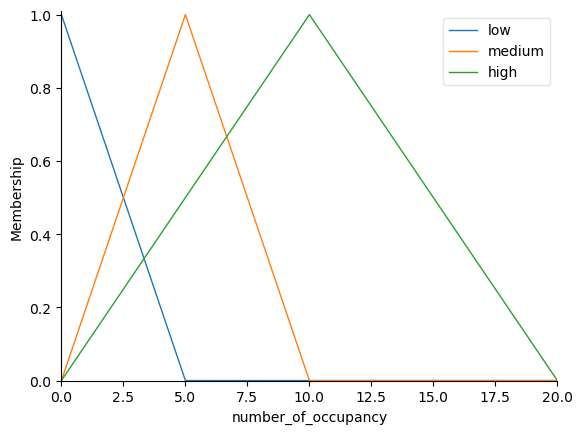

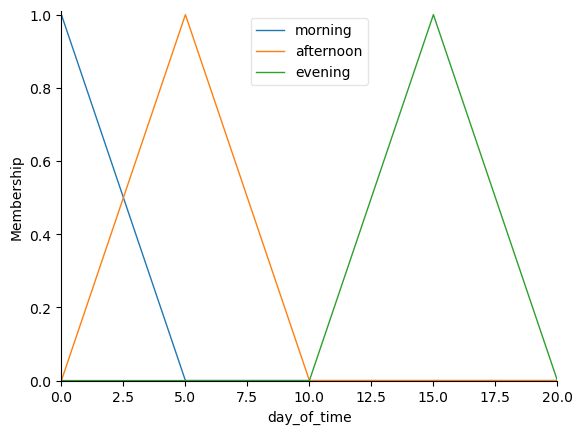

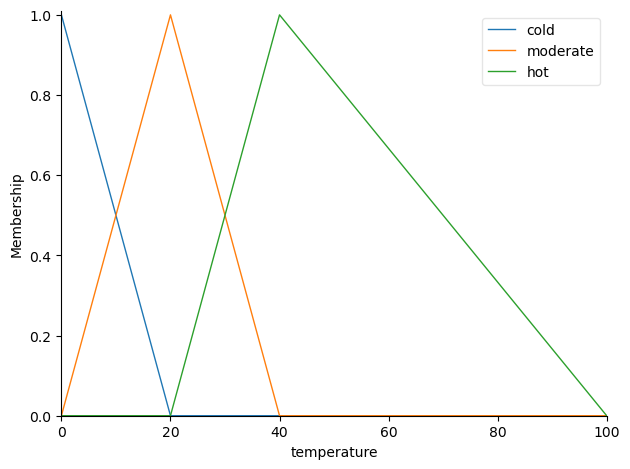

<Figure size 600x400 with 0 Axes>

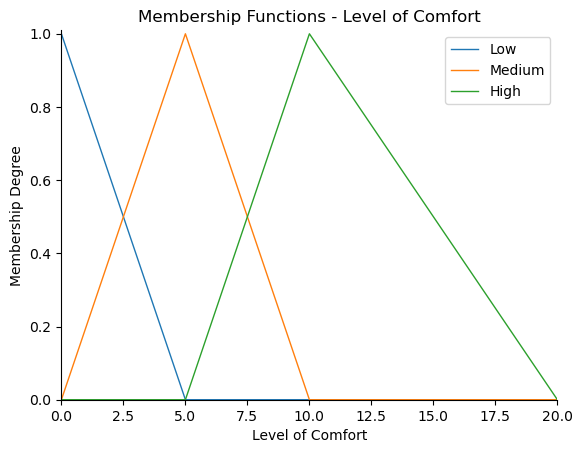

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define linguistic variables and their ranges
number_of_occupancy_range = np.arange(0, 21, 1)
day_of_time_range = np.arange(0, 21, 1)
temperature_range = np.arange(0, 101, 1)
level_of_comfort_range = np.arange(0, 21, 1)

# Define input variables
number_of_occupancy = ctrl.Antecedent(number_of_occupancy_range, 'number_of_occupancy')
day_of_time = ctrl.Antecedent(day_of_time_range, 'day_of_time')
temperature = ctrl.Antecedent(temperature_range, 'temperature')

# Define output variable
level_of_comfort = ctrl.Consequent(level_of_comfort_range, 'level_of_comfort')

# Define membership functions for input variables
number_of_occupancy['low'] = fuzz.trimf(number_of_occupancy_range, [0, 0, 5])
number_of_occupancy['medium'] = fuzz.trimf(number_of_occupancy_range, [0, 5, 10])
number_of_occupancy['high'] = fuzz.trimf(number_of_occupancy_range, [0, 10, 20])

day_of_time['morning'] = fuzz.trimf(day_of_time_range, [0, 0, 5])
day_of_time['afternoon'] = fuzz.trimf(day_of_time_range, [0, 5, 10])
day_of_time['evening'] = fuzz.trimf(day_of_time_range, [10, 15, 20])

temperature['cold'] = fuzz.trimf(temperature_range, [0, 0, 20])
temperature['moderate'] = fuzz.trimf(temperature_range, [0, 20, 40])
temperature['hot'] = fuzz.trimf(temperature_range, [20, 40, 100])

# Define membership functions for output variable
level_of_comfort['low'] = fuzz.trimf(level_of_comfort_range, [0, 0, 5])
level_of_comfort['medium'] = fuzz.trimf(level_of_comfort_range, [0, 5, 10])
level_of_comfort['high'] = fuzz.trimf(level_of_comfort_range, [5, 10, 20])

# Take input from the user
number_of_occupancy_input = float(input("Enter number of occupancy (0-20): "))
day_of_time_input = float(input("Enter day of time (0-20): "))
temperature_input = float(input("Enter temperature (0-100): "))

# Plot membership functions for input variables
#fig, axs = plt.subplots(3, 1, figsize=(10, 8))

number_of_occupancy.view(ax=axs[0], title='Membership Functions - Number of Occupancy')
day_of_time.view(ax=axs[1], title='Membership Functions - Day of Time')
temperature.view(ax=axs[2], title='Membership Functions - Temperature')

axs[0].legend(['Low', 'Medium', 'High'])
axs[1].legend(['Morning', 'Afternoon', 'Evening'])
axs[2].legend(['Cold', 'Moderate', 'Hot'])

plt.tight_layout()
plt.show()

# Plot membership functions for output variable
plt.figure(figsize=(6, 4))

level_of_comfort.view()
plt.legend(['Low', 'Medium', 'High'])

plt.title('Membership Functions - Level of Comfort')
plt.xlabel('Level of Comfort')
plt.ylabel('Membership Degree')
plt.show()
